In [1]:
%%html
<style type="text/css">
input.good:checked + label {color: green}
input.bad:checked + label {color: red}
input.good:checked + label::after {color: green; content: ' Õige vastus!'}
input.bad:checked + label::after {color: red; content: ' Vale vastus!'}
</style>

# 1-mõõtmeline dünaamiline süsteem

## Faasiportree

Ühemõõtmelise dünaamilise süsteemi faasiruum $Q$ võib olla $S^1$, $\mathbb{R}$ või alamhulk $\mathbb{R}$'ist. Siin me eeldame, et $Q = \mathbb{R}$. Seega on faasiportree ka ühemõõtmeline, ja võib olla näiteks selline:

![Ühemõõtmeline faasiportree](https://moodle.ut.ee/file.php/4477/dim1_ps.png)

Kuna sellest graafikust on raske näha, mis toimub, joonistatakse ühemõõtmeliste süsteemide faasiportreesid hoopis teisel kujul. Selleks aitab meelde tuletada, et sellise süsteemi dünaamikat kirjeldab diferentsiaalvõrrand $\dot{x} = f(x)$, ja et funktsioon $f$ määrab dünaamikat. Seega on kõige lihtsam ja arusaadavam viis joonistada funktsiooni $f$, mis võib olla sellisel kujul:

![Ühemõõtmeline faasiportree](https://moodle.ut.ee/file.php/4477/dim1_fix.png)

See graafik näitab palju paremini süsteemi käitumist. Täpsemalt näeme:

* Kui $f(x) > 0$, siis liigub süsteem paremale.
* Kui $f(x) < 0$, siis liigub süsteem vasakule.
* Kui $f(x) = 0$, siis süsteem ei liigu - see on püsipunkt.

## Püsipunktid ja nende stabiilsus

Faasiportree on kasulik mitte ainult püsipunktide leidmiseks, vaid ka nende liigitamiseks. Seda näitab kõige lihtsamini ühemõõtmeline näide:

![Ühemõõtmeline faasiportree](https://moodle.ut.ee/file.php/4477/dim1_fix.png)

Antud näites on kolm püsipunktide tüüpi:

<dl>
<dt>Atraktor (stabiilne sõlm) ●</dt>
<dd>Vool siseneb punkti mõlemalt poolt.</dd>
<dt>Repeller (ebastabiilne sõlm) ○</dt>
<dd>Vool väljub punktist mõlemalt poolt.</dd>
<dt>Sadul ◐</dt>
<dd>Vool siseneb ühelt poolt ja väljub teiselt poolt.</dd>
</dl>

Kui dünaamilist süsteemi kirjeldab diferentsiaalvõrrand $\dot{x} = f(x)$, siis näitavad funktsiooni $f$ väärtused püsipunkti $x_*$ ümbruses tema omadusi:

<dl>
<dt>Atraktor (stabiilne sõlm) ●</dt>
<dd>$f(x) > 0$ kui $x < x_*$ ja $f(x) < 0$ kui $x > x_*$</dd>
<dt>Repeller (ebastabiilne sõlm) ○</dt>
<dd>$f(x) < 0$ kui $x < x_*$ ja $f(x) > 0$ kui $x > x_*$</dd>
<dt>Sadul ◐</dt>
<dd>Funktsioonil $f(x)$ märk on sama mõlemal pool püsipunktist $x_*$</dd>
</dl>

## Lahendite kvalitatiivne käitumine

Faasiportree on ka kasulik süsteemi lahendite kvalitatiivse käitumise leidmiseks. Selleks on kõige lihtsam joonistada trajektoore funktsioonidena x(t):

![Ühemõõtmeline faasiportree](https://moodle.ut.ee/file.php/4477/dim1_sol.png)

Diagramm näitab, et trajektoorid **koonduvad** atraktori ümbruses ja **lahknevad** repelleri ümbruses. Sadula ümbruses nad ühelt poolt koonduvad ja teiselt poolt lahknevad.

Graafiliselt saab ka näidata üldise ühemõõtmelise dünaamilise süsteemi lahendite omadusi:

* Trajektoorid kunagi ei lähe läbi püsipunkti.
* Tuletise $\dot{x}$ märk trajektooril kunagi ei muutu.

Viimasest omadusest järeldub ka, et ühemõõtmeline dünaamiline süsteem ei saa võnkuda (ehk perioodiliselt või ebaperioodiliselt edasi ja tagasi minna). Ainus võimalus, kuidas selline süsteem saab olla perioodiline, on faasiruum $Q = S^1$ ja trajektoor käib ringi.

# Interaktiivne näide: liikumine ringjoone peal

Selles näites kasutame NumPy numbrilisteks arvutusteks ja PyPlot joonistamiseks.

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Kõigepealt defineerime süsteemi dünaamikat. Siin eeldame et $x \in S^1$, ehk faasiruum on $Q = S^1$. Koordinaatideks võib valida vahemikku $[0, 2\pi)$. Antud juhul vaatame dünaamikat $\dot{x} = f_k(x) = \sin x + k$, kus $k \in \mathbb{R}$ on konstantne parameeter.

In [3]:
def dxdt(x, k):
    return np.sin(x) + k

Süsteemi voolu joonistamiseks valime 20 punkti ringjoone peal.

In [4]:
nx = 20
X = np.linspace(2 * np.pi / nx, 2 * np.pi, nx)
PX = 0.9 * np.cos(X)
PY = 0.9 * np.sin(X)

Lisaks joonistame ka ringjoone, milleks on rohkem punkte vaja.

In [5]:
XX = np.linspace(0, 2 * np.pi, 201)
PPX = np.cos(XX)
PPY = np.sin(XX)

Lõpuks defineerime joonistamisfunktsiooni, mis arvutab $f_k(x)$ valitud punktides ja joonistab faasiportreet.

In [6]:
def fp(k):
    # arvutame \dot{x}
    R = np.zeros((nx))
    for i in range(nx):
        R[i] = dxdt(X[i], k)
    U = -R * PY
    V = R * PX

    # joonistus
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', 'box')
    ax.axis('off')

    # ringjoon
    ax.plot(PPX, PPY, 'k-')

    # nooled
    ax.quiver(PX, PY, U, V, facecolor='b', width=0.01)

    # püsipunktid
    if np.fabs(k) < 1.0:
        pp = -np.arcsin(k)
        ax.plot([0.9 * np.cos(pp)], [0.9 * np.sin(pp)], marker='o', markeredgecolor='k', markerfacecolor='w', markersize=8)
        ax.plot([-0.9 * np.cos(pp)], [0.9 * np.sin(pp)], marker='o', markeredgecolor='k', markerfacecolor='k', markersize=8)
    elif np.fabs(k) == 1.0:
        ax.plot([0.0], [-0.9 * k], marker='o', markeredgecolor='k', markerfacecolor='gray', markersize=8)

    # näita joonistust
    plt.show()

Kui me valime $k = 0$, on süsteemil 2 püsipunkti. Üks neist on repeller $x = 0$, teine on atraktor $x = \pi$.

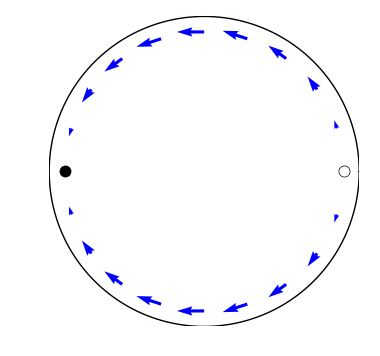

In [7]:
fp(0)

Kui $k$ on nullist erinev, aga $|k| < 1$, muutuvad püsipunktide asukohad.

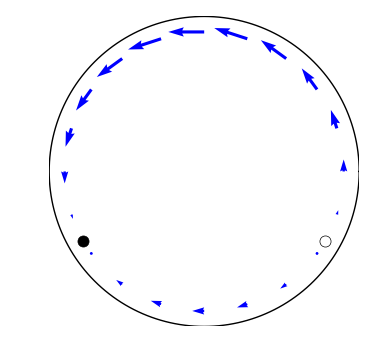

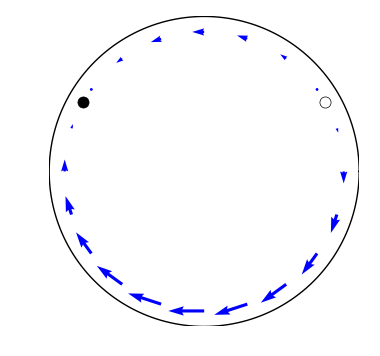

In [8]:
fp(0.5)
fp(-0.5)

Juhul kui $|k| = 1$, jääb ainult üks püsipunkt alles, mis on sadul.

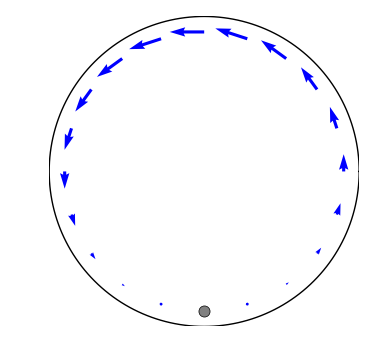

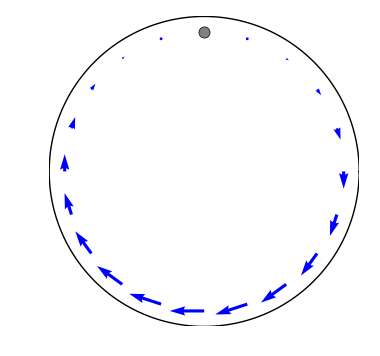

In [9]:
fp(1.0)
fp(-1.0)

Kui me valime $|k| > 1$, püsipunkte enam ei ole.

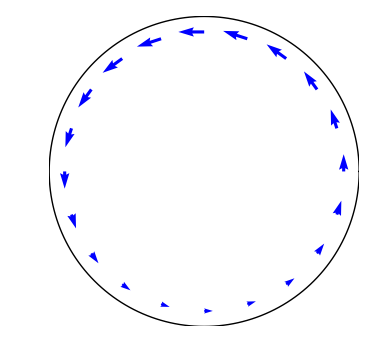

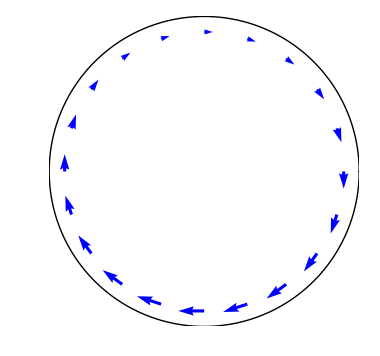

In [10]:
fp(2.0)
fp(-2.0)

Dünaamilise süsteemi kvalitatiivse käitumise sõltuvust konstantsest parameetriest käsitleme lähemalt hiljem loengus, bifurkatsiooni teemal.

# Küsimused

## Stabiilsete püsipunktide asukohad

Kus asuvad süsteemi $\dot{x} = \cos(x)$ stabiilsed püsipunktid?

* <input id="cosA" name="cos" class="bad" type="radio"><label for="cosA">&hellip; -4π, -2π, 0, 2π, 4π &hellip;</label>
* <input id="cosB" name="cos" class="good" type="radio"><label for="cosB">&hellip; -7π/2, -3π/2, π/2, 5π/2, 9π/2 &hellip;</label>
* <input id="cosC" name="cos" class="bad" type="radio"><label for="cosC">&hellip; -5π, -3π, -π, π, 3π, 5π &hellip;</label>
* <input id="cosD" name="cos" class="bad" type="radio"><label for="cosD">&hellip; -9π/2, -5π/2, -π/2, 3π/2, 7π/2 &hellip;</label>

## Atraktor ja repellor

Kui ● on atraktor ja ○ on repeller, kumb on õigesti tähistatud faasiportree?

| Pilt | Faasiportree |
|---|---|
| <input type="radio" id="arA" name="ar" class="good"/><label for="arA">Pilt 1</label> | ![vasakul atraktor, paremal repeller](https://moodle.ut.ee/file.php/4477/dim1_answer_c.png) |
| <input type="radio" id="arB" name="ar" class="bad"/><label for="arB">Pilt 2</label> | ![vasakul repeller, paremal atraktor](https://moodle.ut.ee/file.php/4477/dim1_answer_w.png) |

## Repellerite arv

Mitu repellerit on süsteemil $\dot{x} = x³ - x$?

* <input id="rep0" name="rep" class="bad" type="radio"><label for="rep0">0</label>
* <input id="rep1" name="rep" class="bad" type="radio"><label for="rep1">1</label>
* <input id="rep2" name="rep" class="good" type="radio"><label for="rep2">2</label>
* <input id="rep3" name="rep" class="bad" type="radio"><label for="rep3">3</label>

## Sadula asukoht

Kus asub süsteemi $\dot{x} = x³ - x² - x + 1$ sadul?

* <input id="sadA" name="sad" class="bad" type="radio"><label for="sadA">-1</label>
* <input id="sadB" name="sad" class="bad" type="radio"><label for="sadB">0</label>
* <input id="sadC" name="sad" class="good" type="radio"><label for="sadC">1</label>